# Text Embeddings for Material Descriptions

This notebook demonstrates how to generate semantic embeddings from material descriptions using Sentence Transformers.

In [1]:
# Setup
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.embeddings.text_embeddings import MaterialEmbeddings
from src.sap_connector import create_sample_materials

## 1. Initialize Text Embedder

In [2]:
# Initialize
embedder = MaterialEmbeddings()

print(f"Model: {embedder.model_name}")
print(f"Ready to generate 768-dimensional embeddings")

Loading model: sentence-transformers/all-mpnet-base-v2
✓ Model loaded successfully
Model: sentence-transformers/all-mpnet-base-v2
Ready to generate 768-dimensional embeddings


## 2. Generate Single Embedding

In [3]:
# Single material
description = "Steel Bolt M8x50 DIN 933"
embedding = embedder.encode(description)

print(f"Description: {description}")
print(f"Embedding shape: {embedding.shape}")
print(f"First 10 dimensions: {embedding[:10]}")
print(f"Embedding norm: {np.linalg.norm(embedding):.4f}")

Description: Steel Bolt M8x50 DIN 933
Embedding shape: (768,)
First 10 dimensions: [-0.04134025 -0.0731026   0.01368329  0.04365119 -0.00679921  0.02705323
 -0.01141844 -0.01791948  0.01702806 -0.0325964 ]
Embedding norm: 1.0000


## 3. Compare Two Materials

In [4]:
# Compare similar materials
mat1 = "Steel Bolt M8x50 DIN 933"
mat2 = "Stainless Steel Bolt M8x50 ISO 4017"
mat3 = "Plastic Washer M8"

sim_12 = embedder.similarity(mat1, mat2)
sim_13 = embedder.similarity(mat1, mat3)

print(f"Similarity between:")
print(f"  '{mat1}'")
print(f"  '{mat2}'")
print(f"  → {sim_12:.4f}")
print()
print(f"Similarity between:")
print(f"  '{mat1}'")
print(f"  '{mat3}'")
print(f"  → {sim_13:.4f}")

Similarity between:
  'Steel Bolt M8x50 DIN 933'
  'Stainless Steel Bolt M8x50 ISO 4017'
  → 0.7035

Similarity between:
  'Steel Bolt M8x50 DIN 933'
  'Plastic Washer M8'
  → 0.3683


## 4. Batch Processing

In [5]:
# Generate sample materials
materials = create_sample_materials(n_materials=20)
descriptions = [m['MAKTX'] for m in materials]

# Encode all
embeddings = embedder.encode_batch(descriptions, show_progress=True)

print(f"\nEncoded {len(descriptions)} materials")
print(f"Embeddings shape: {embeddings.shape}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Encoded 20 materials
Embeddings shape: (20, 768)


## 5. Visualize in 2D

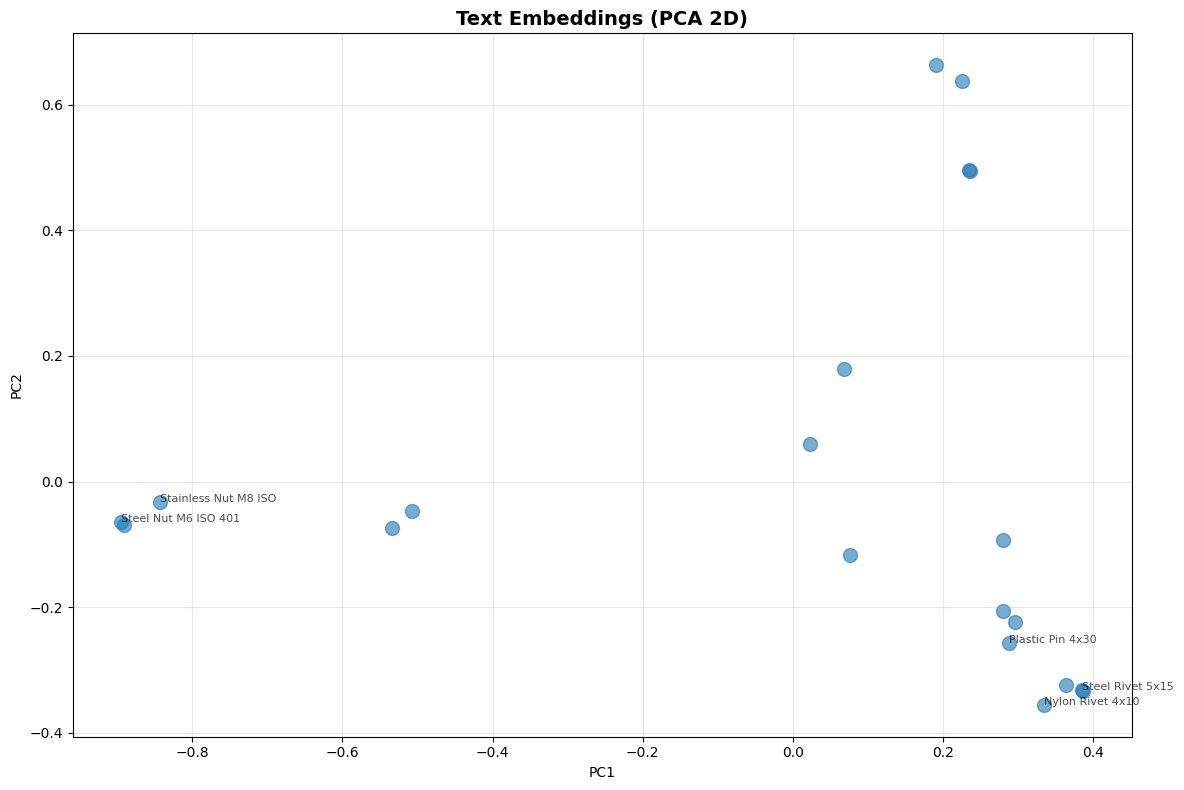

In [6]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100, alpha=0.6)

# Annotate a few points
for i in range(min(5, len(descriptions))):
    plt.annotate(descriptions[i][:20], 
                (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                fontsize=8, alpha=0.7)

plt.title('Text Embeddings (PCA 2D)', fontsize=14, fontweight='bold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Similarity Matrix

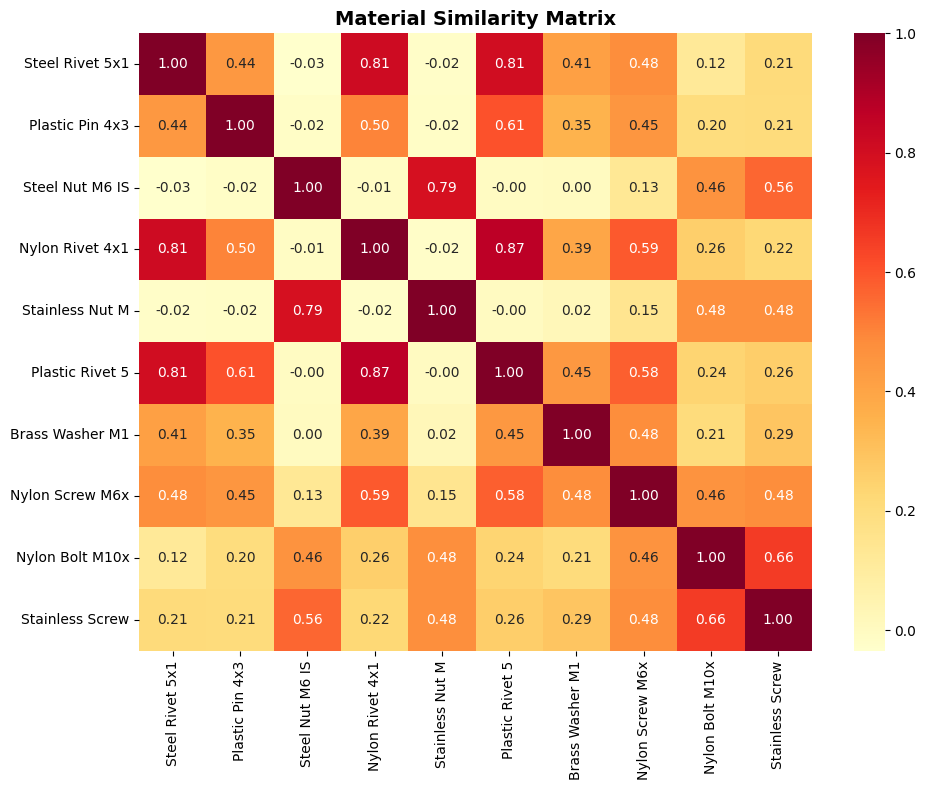

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Compute similarity matrix (first 10 materials)
n = min(10, len(embeddings))
sim_matrix = cosine_similarity(embeddings[:n])

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, annot=True, fmt='.2f', cmap='YlOrRd',
           xticklabels=[d[:15] for d in descriptions[:n]],
           yticklabels=[d[:15] for d in descriptions[:n]])
plt.title('Material Similarity Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## ✅ Key Takeaways

- Text embeddings capture **semantic meaning**
- Similar materials have **high cosine similarity**
- 768 dimensions encode rich information
- Fast batch processing for large catalogs

## 🎯 Next: Multimodal Embeddings

Continue to **Notebook 03** to see how adding categorical, characteristics, and relational features improves similarity detection by 1481%!
